In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mainpath='csse_covid_19_data/csse_covid_19_time_series/'

In [3]:
def getCountryStats(country='World'):
    data=dict()

    for case in ['Confirmed','Deaths','Recovered']:            
        df=pd.read_csv(mainpath+'time_series_19-covid-{}.csv'.format(case))
        days=df.columns[4:]
        
        if country.lower()!='world':
            isCountry=df['Country/Region']==country
            df=df[isCountry]
            
        data[case]= {'days':days,'people':np.array(df[days].sum())}   
    
    start=data['Confirmed']['people']>0
    print('COVID-19 first day in {}: {}'.format(country,data['Confirmed']['days'][start][0])) 
    
    print('TOTAL CASES IN {}'.format(country.upper()))
    print('================')
    for case in ['Confirmed','Deaths','Recovered']:
        print('{:9s}: {:6d}'.format(case,int(max(data[case]['people']))))
        
    plt.figure(figsize=(18,6))       
    for case in ['Confirmed','Deaths','Recovered']:
        plt.plot_date(data[case]['days'][start],data[case]['people'][start],'-o',label=case)
    plt.title('{} COVID-19 cases'.format(country))
    plt.ylabel('Confirmed Cases')
    plt.xlabel('Days')
    plt.legend()
    
    plt.grid()
    if max(data['Confirmed']['people'])>1000:
        plt.yscale('log')
    if len(data[case]['days'][start])>30:
        plt.xticks(data[case]['days'][start][::3])
    plt.tick_params(axis='x',rotation=90)
    
    return data

# World

COVID-19 first day in World: 1/22/20
TOTAL CASES IN WORLD
Confirmed: 197168
Deaths   :   7905
Recovered:  80840


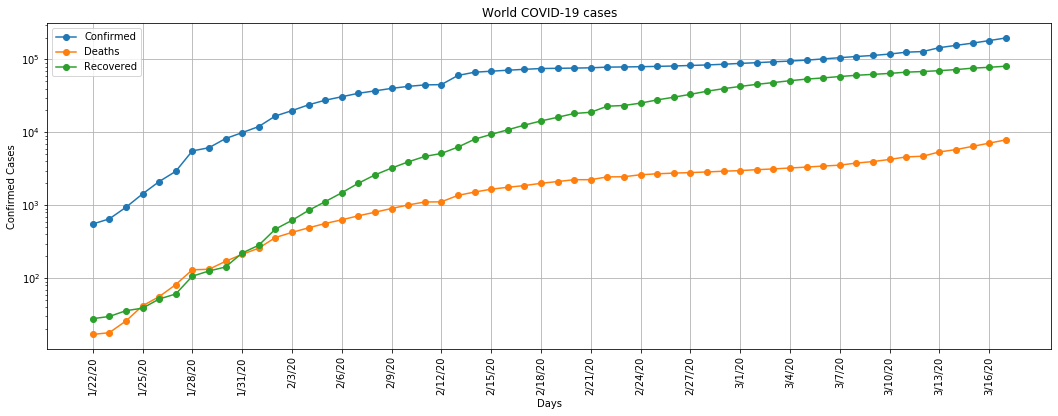

In [4]:
stats=getCountryStats()

# Mexico

COVID-19 first day in Mexico: 2/28/20
TOTAL CASES IN MEXICO
Confirmed:     82
Deaths   :      0
Recovered:      4


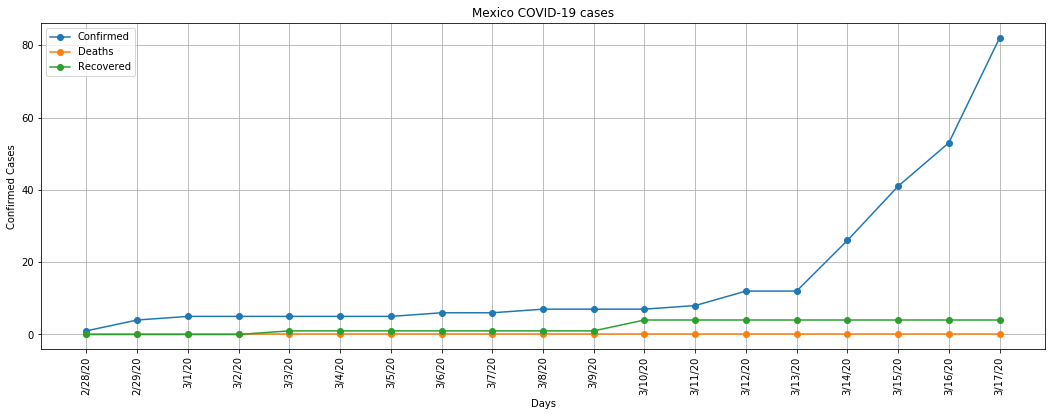

In [5]:
mexstats=getCountryStats('Mexico')